# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_12'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_14.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t[0].detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

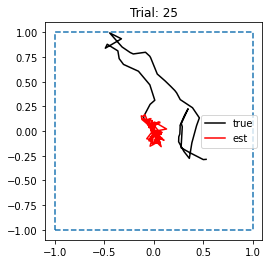

In [7]:
trial_plt = 25

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos[trial_plt], pos_est[trial_plt], ax)

In [11]:
for name, param in model.rnn.named_parameters():
    print(name)
    print(param)
    

weight_ih_l0
Parameter containing:
tensor([[-6.7640e-02,  5.9900e-01],
        [-1.7657e-01,  2.1171e-01],
        [ 4.4808e-01, -4.0825e-01],
        [ 9.6704e-01, -1.7877e-01],
        [-4.5101e-01,  5.9150e-01],
        [ 5.9959e-01, -1.0773e+00],
        [-3.1704e-01,  9.1509e-01],
        [ 5.4870e-01,  2.8217e-02],
        [ 1.0320e-01,  1.3826e-01],
        [ 4.0954e-01, -4.0072e-01],
        [ 1.7311e-01,  1.2259e+00],
        [ 8.2410e-01, -2.4055e-01],
        [ 2.0874e-01, -2.7972e-01],
        [ 1.7041e-01,  1.2511e+00],
        [-3.2955e-01,  4.3443e-01],
        [-1.1468e+00,  3.4710e-01],
        [ 3.6260e-01, -5.2668e-01],
        [ 8.9838e-01, -1.1980e+00],
        [ 9.0439e-02,  6.2717e-01],
        [-8.9785e-01,  3.0879e-01],
        [-1.4617e-01,  3.0085e-01],
        [ 2.1153e-01,  9.5384e-01],
        [ 5.4561e-01, -2.3823e-01],
        [-4.1202e-01, -3.8526e-01],
        [ 1.3532e-02,  6.5243e-01],
        [-2.7925e-01, -6.6607e-01],
        [ 2.6271e-01, -4.0848

In [14]:
print(model.rnn.get_parameter('weight_hh_l0'))

Parameter containing:
tensor([[-0.0320,  0.0860,  0.0916,  ...,  0.1342, -0.1809, -0.0689],
        [ 0.0130, -0.0157, -0.0466,  ..., -0.0547, -0.0119, -0.0515],
        [-0.0472, -0.0107, -0.0123,  ..., -0.0059, -0.0398, -0.0559],
        ...,
        [ 0.0716,  0.0197,  0.1029,  ..., -0.0453, -0.0756, -0.1041],
        [-0.0487, -0.2006,  0.0639,  ..., -0.0800, -0.0310,  0.0924],
        [-0.0277,  0.1346, -0.1053,  ..., -0.0667, -0.0466, -0.1259]],
       requires_grad=True)
